## Predição de Performance de Colaboradores


## Entendimento do negócio




## Objetivo


Uma empresa de Contact Center e Customer Experience contrata muitas pessoas por ano. Esse ramo de Contact Center é conhecido por ser a porta de entrada de muita gente no mercado, pois não exige muita experiência.

 

No entanto, o turnover por baixo desempenho dos colaboradores também é muito alto, fazendo com que a empresa tenha que ficar contratando e treinando pessoas constantemente para que a operação de atendimento não fique sem colaboradores e o cliente final não sinta uma demora para ser atendimento nos mais diversos canais de atendimento, desde o telefone até o chat e whatsapp.

 

A empresa gostaria de testar técnicas de People Analytics para ajudar o time de Atração de Talentos a filtrar melhor os perfis de colaboradores no processo seletivo a fim de trazer mais colaboradores com potencial de boa performance no trabalho. Para isso, os analistas de dados devem analisar um histórico de 7.240 colaboradores e sua performance após 6 meses a contração para responder:

 

Com base nessas informações, pede-se:

 

1.     Quais fatores o time de Atração de Talentos deve olhar para selecionar candidatos com maior chance de ter boa performance após 6 meses à data da contratação?

 

2.     Com base nisso, qual política de contratação deve passar a valer de forma que a empresa aumente as boas contratações?

## Análise SWOT




Forças (Strengths):

Potencial para melhorar significativamente a qualidade das contratações através de critérios mais objetivos e estruturados
Possibilidade de reduzir o tempo do processo seletivo com uma filtragem mais eficiente
Capacidade de criar um banco de dados com perfis adequados para futuras vagas
Maior alinhamento entre as expectativas da empresa e o perfil dos candidatos

Fraquezas (Weaknesses):

Risco de criar filtros muito rígidos que podem excluir talentos potenciais
Necessidade de investimento em treinamento da equipe para aplicar novos critérios
Possível resistência interna a mudanças no processo atual
Dificuldade em estabelecer métricas precisas para prever performance futura

Oportunidades (Opportunities):

Uso de tecnologias e ferramentas de análise de dados para aprimorar o processo
Desenvolvimento de um processo mais estruturado que pode ser replicado em diferentes áreas
Possibilidade de criar um programa de referências mais eficiente
Potencial redução nos custos de turnover com melhores contratações
Fortalecimento da marca empregadora com processos mais profissionais

Ameaças (Threats):

Mercado competitivo pode dificultar a atração dos perfis desejados
Mudanças rápidas no mercado podem tornar alguns critérios de seleção obsoletos
Risco de perder bons candidatos para concorrentes durante um processo muito longo
Possíveis questões legais relacionadas a critérios de seleção discriminatórios
Dificuldade em manter consistência no processo em diferentes departamentos

## Análise SMART


Específico (Specific):

Implementar um sistema estruturado de avaliação de candidatos baseado em:

Competências técnicas alinhadas com cada cargo
Soft skills prioritárias para a empresa
Histórico de performance em experiências anteriores
Fit cultural com a organização
Potencial de desenvolvimento



Mensurável (Measurable):

Definir métricas claras de sucesso:

Redução de 30% no tempo médio de contratação
Aumento de 25% na taxa de retenção após período probatório
Melhoria de 40% nas avaliações de performance do primeiro ano
Redução de 50% no índice de turnover precoce (primeiros 6 meses)
Aumento de 20% na satisfação dos gestores com as novas contratações



Alcançável (Attainable):

Estabelecer etapas graduais de implementação:

Fase 1: Mapeamento dos critérios de sucesso por cargo
Fase 2: Desenvolvimento de ferramentas de avaliação
Fase 3: Treinamento da equipe de recrutamento
Fase 4: Implementação piloto em departamentos específicos
Fase 5: Expansão para toda a empresa



Relevante (Relevant):

Alinhar o projeto com objetivos estratégicos:

Redução de custos com recrutamento e treinamento
Aumento da produtividade geral
Melhoria do clima organizacional
Fortalecimento da cultura empresarial
Desenvolvimento de equipes mais eficientes



Temporal (Time-bound):

Estabelecer cronograma de implementação:

Mês 1-2: Desenvolvimento do projeto e critérios
Mês 3: Treinamento da equipe
Mês 4-5: Teste piloto
Mês 6: Avaliação de resultados preliminares
Mês 7-8: Ajustes e melhorias
Mês 9-12: Implementação completa em toda empresa
Mês 12: Avaliação geral dos resultados

## Entendimento dos dados

# 1. Carregando as Bibliotecas

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scorecardpy as sc
sns.set()

# 2.Carregando Dataset - Exploração da estrutura

In [2]:
metadados = pd.read_excel('base_atendimento.xlsx', header=1)
metadados = baseoriginal.iloc[:,:4]
metadados

NameError: name 'baseoriginal' is not defined

O dataframe metadados identifica as variáveis de nosso dataset base

In [5]:
df = pd.read_excel('base_atendimento.xlsx',sheet_name="Base")
df.head()

,Id_Agente,Boa_Performance,"P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?",P 02: Qual área de atendimento você atua ou atuou por mais tempo?,P 03: Qual a sua escolaridade?,P 04: Qual seu conhecimento em inglês?,P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?,P 06: Você possui dependentes?,P 07: É bom trabalhar com meus colegas de trabalho.,P 08: Não tenho medo de criticar pessoas em cargos de liderança.,P 09: Fico tenso quando estou trabalhando.,P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.,P 11: Gosto de dizer o que penso.,P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.
0,1,1,Não,Sem resposta,Ensino Superior incompleto,Intermediário,Sem resposta,Não,0 - Sem resposta,0 - Sem resposta,0 - Sem resposta,0 - Sem resposta,0 - Sem resposta,0 - Sem resposta
1,2,1,Sim,Atendimento Receptivo,Ensino Médio completo,Não tenho conhecimento em inglês,Sem resposta,Não,0 - Sem resposta,0 - Sem resposta,0 - Sem resposta,0 - Sem resposta,0 - Sem resposta,0 - Sem resposta
2,3,1,Sim,Ativo de Vendas,Ensino Superior cursando,Intermediário,Sem resposta,Não,4 - Concordo,3 - Indiferente,3 - Indiferente,2 - Discordo,2 - Discordo,2 - Discordo
3,4,0,Não,Sem resposta,Ensino Superior concluído,Básico,Sem resposta,Não,4 - Concordo,4 - Concordo,4 - Concordo,4 - Concordo,4 - Concordo,3 - Indiferente
4,5,0,Não,Sem resposta,Ensino Médio completo,Avançado,Sem resposta,Não,4 - Concordo,4 - Concordo,3 - Indiferente,3 - Indiferente,4 - Concordo,2 - Discordo


Vemos que cada linha contém a informação referente a cada Colaborador, além da informação referente a Boa Performance.

In [18]:
df.dtypes

Id_Agente                                                                             int64
Boa_Performance                                                                       int64
P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?       object
P 02: Qual área de atendimento você atua ou atuou por mais tempo?                    object
P 03: Qual a sua escolaridade?                                                       object
P 04: Qual seu conhecimento em inglês?                                               object
P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?                 object
P 06: Você possui dependentes?                                                       object
P 07: É bom trabalhar com meus colegas de trabalho.                                  object
P 08: Não tenho medo de criticar pessoas em cargos de liderança.                     object
P 09: Fico tenso quando estou trabalhando.                                      

In [ ]:
df.drop('Id_Agente', axis = 1, inplace=True) 

Como não vou  utlizar A Coluna Id_Agente,retirei a mesma.

In [25]:
df.columns

Index(['Boa_Performance',
       'P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?',
       'P 02: Qual área de atendimento você atua ou atuou por mais tempo?',
       'P 03: Qual a sua escolaridade?',
       'P 04: Qual seu conhecimento em inglês?',
       'P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?',
       'P 06: Você possui dependentes?',
       'P 07: É bom trabalhar com meus colegas de trabalho.',
       'P 08: Não tenho medo de criticar pessoas em cargos de liderança.',
       'P 09: Fico tenso quando estou trabalhando.',
       'P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.',
       'P 11: Gosto de dizer o que penso.',
       'P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.'],
      dtype='object')

In [26]:
df.shape

(7240, 13)

In [27]:
df.isnull().sum()

Boa_Performance                                                                      0
P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?       0
P 02: Qual área de atendimento você atua ou atuou por mais tempo?                    0
P 03: Qual a sua escolaridade?                                                       0
P 04: Qual seu conhecimento em inglês?                                               0
P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?                 0
P 06: Você possui dependentes?                                                       0
P 07: É bom trabalhar com meus colegas de trabalho.                                  0
P 08: Não tenho medo de criticar pessoas em cargos de liderança.                     0
P 09: Fico tenso quando estou trabalhando.                                           0
P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.    0
P 11: Gosto de dizer o que penso.          

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 13 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   Boa_Performance                                                                    7240 non-null   int64 
 1   P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?     7240 non-null   object
 2   P 02: Qual área de atendimento você atua ou atuou por mais tempo?                  7240 non-null   object
 3   P 03: Qual a sua escolaridade?                                                     7240 non-null   object
 4   P 04: Qual seu conhecimento em inglês?                                             7240 non-null   object
 5   P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?               7240 non-null   object
 6   

O Dataset não possui nenhum tipo de dado faltante/nulo, ou seja, não é necessário realizar nenhum tipo de transformação inicial nos dados atuais.

# 3. Análise Univariada

Nessa parte irei explorar cada variável, afim de entender possíveis causas que colaboram com a Perfomance, além também de descobrir possíveis padrões.

# 3.1 Antes de trabalhar na empresa, você tinha experiência em Contact Center? 

In [32]:
 # Total de respostas refente a experiência

df["P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?"].value_counts()

P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?
Sim                                   3651
Não                                   2380
A empresa é o meu primeiro emprego    1038
Sem resposta                           171
Name: count, dtype: int64

In [41]:
# Frequencia realativa refente a experiência

df["P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?"].value_counts() / sum(df["P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?"].value_counts())

P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?
Sim                                   0.504282
Não                                   0.328729
A empresa é o meu primeiro emprego    0.143370
Sem resposta                          0.023619
Name: count, dtype: float64

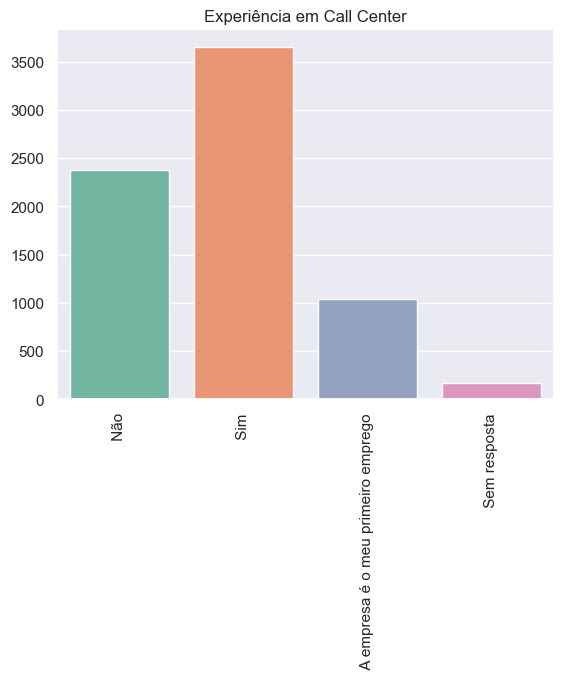

In [69]:
plt.title("Experiência em Call Center")
sns.countplot(
    data=df, 
    x="P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?",
    hue="P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?",
    palette="Set2",
    legend=False
)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

Obtemos que:

              50% dos colaboradores já possuem experência em call Center
              32% dos colaboradores não tinham experência em call Center


# 3.2 Qual área de atendimento você atua ou atuou por mais tempo?

In [35]:
 # Total

df["P 02: Qual área de atendimento você atua ou atuou por mais tempo?"].value_counts()

P 02: Qual área de atendimento você atua ou atuou por mais tempo?
Sem resposta                  3613
Atendimento Receptivo         1487
Backoffice                     473
Ativo de Vendas                353
Cobrança                       320
Suporte Técnico                288
Chat ou email                  265
Multiskill                     226
Retenção                        99
Receptivo de Vendas             90
Suporte Técnico com Vendas      26
Name: count, dtype: int64

In [37]:
# Frequencia relativa 

df["P 02: Qual área de atendimento você atua ou atuou por mais tempo?"].value_counts() / sum(df["P 02: Qual área de atendimento você atua ou atuou por mais tempo?"].value_counts())

P 02: Qual área de atendimento você atua ou atuou por mais tempo?
Sem resposta                  0.499033
Atendimento Receptivo         0.205387
Backoffice                    0.065331
Ativo de Vendas               0.048757
Cobrança                      0.044199
Suporte Técnico               0.039779
Chat ou email                 0.036602
Multiskill                    0.031215
Retenção                      0.013674
Receptivo de Vendas           0.012431
Suporte Técnico com Vendas    0.003591
Name: count, dtype: float64

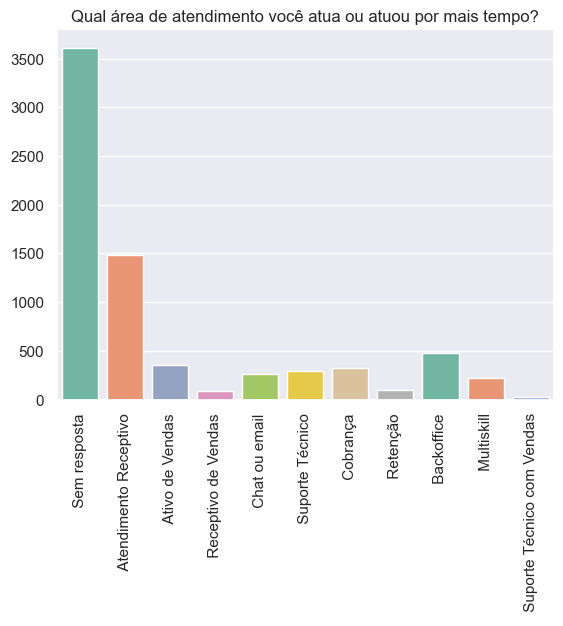

In [74]:
plt.title("Qual área de atendimento você atua ou atuou por mais tempo?")
sns.countplot(
    data=df, 
    x="P 02: Qual área de atendimento você atua ou atuou por mais tempo?",
    hue="P 02: Qual área de atendimento você atua ou atuou por mais tempo?",
    palette="Set2",
    legend=False
)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

Obtemos que:

          49% dos colaboradores não responderam ou não tiveram suas respostas computadas.
          20% dos colaboradores atuaram em atendimento receptivo

# 3.3 Qual a sua escolaridade? 

In [53]:
 # Total

df["P 03: Qual a sua escolaridade?"].value_counts()

P 03: Qual a sua escolaridade?
Ensino Médio completo         2880
Ensino Superior cursando      1799
Ensino Superior concluído     1237
Ensino Superior incompleto     966
Pós Graduação cursando         137
Pós Graduação concluído        129
Sem resposta                    92
Name: count, dtype: int64

In [59]:
# Frequencia relativa 

df["P 03: Qual a sua escolaridade?"].value_counts() / sum(df["P 03: Qual a sua escolaridade?"].value_counts())

P 03: Qual a sua escolaridade?
Ensino Médio completo         0.397790
Ensino Superior cursando      0.248481
Ensino Superior concluído     0.170856
Ensino Superior incompleto    0.133425
Pós Graduação cursando        0.018923
Pós Graduação concluído       0.017818
Sem resposta                  0.012707
Name: count, dtype: float64

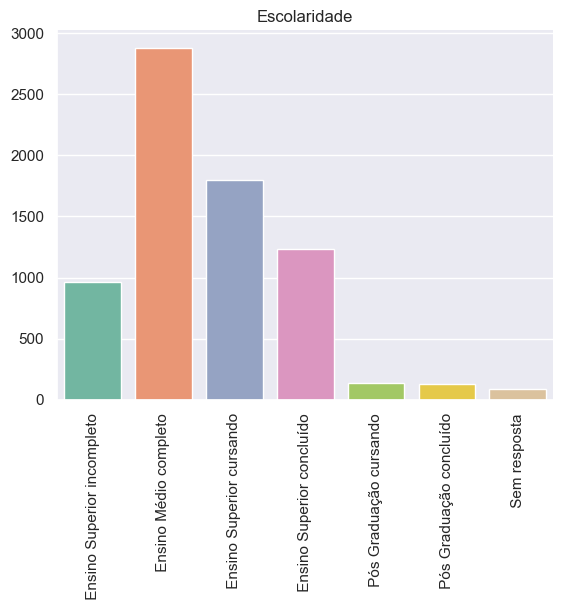

In [76]:

plt.title("Escolaridade")
sns.countplot(
    data=df, 
    x="P 03: Qual a sua escolaridade?",
    hue="P 03: Qual a sua escolaridade?",
    palette="Set2",
    legend=False
)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

Obtemos que:

          39% dos colaboradores tem Ensino Médio Completo
          24% dos colaboradores estão Cursando o Ensino Superior

# 3.4 Qual seu conhecimento em inglês? 

In [57]:
 # Total

df["P 04: Qual seu conhecimento em inglês?"].value_counts()

P 04: Qual seu conhecimento em inglês?
Básico                              3668
Não tenho conhecimento em inglês    1406
Intermediário                       1359
Avançado                             463
Fluente                              173
Sem resposta                         171
Name: count, dtype: int64

In [60]:
# Frequencia relativa 

df["P 04: Qual seu conhecimento em inglês?"].value_counts() / sum(df["P 04: Qual seu conhecimento em inglês?"].value_counts())

P 04: Qual seu conhecimento em inglês?
Básico                              0.506630
Não tenho conhecimento em inglês    0.194199
Intermediário                       0.187707
Avançado                            0.063950
Fluente                             0.023895
Sem resposta                        0.023619
Name: count, dtype: float64

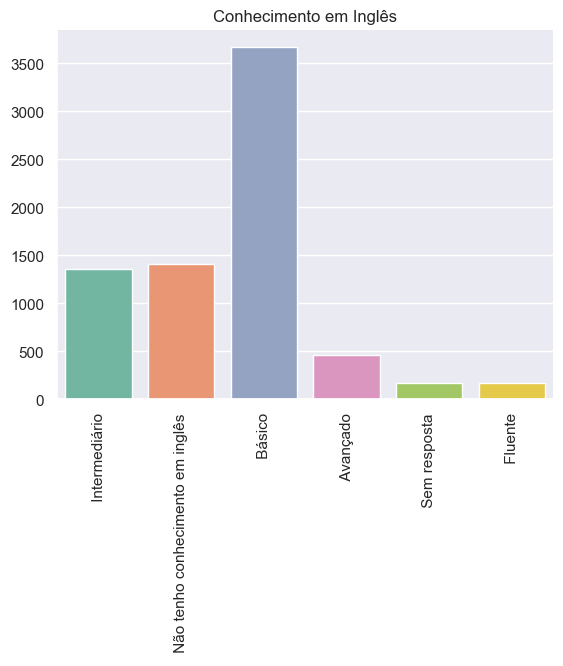

In [80]:

plt.title("Conhecimento em Inglês")
sns.countplot(
    data=df, 
    x="P 04: Qual seu conhecimento em inglês?",
    hue="P 04: Qual seu conhecimento em inglês?",
    palette="Set2",
    legend=False
)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

Obtemos que:

          50% dos colaboradores tem Conhecimento básico em Inglês
          19% dos colaboradores nao tem Conhecimento básico em Inglês
          

# 3.5 Qual o tempo gasto no trajeto da sua residência até a empresa?  

In [83]:
 # Total

df["P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?"].value_counts()

P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?
Sem resposta     5033
De 1h à 1h30      712
De 30min à 1h     540
De 1h30 à 2h      523
Até 30min         314
Acima de 2h       118
Name: count, dtype: int64

In [84]:
# Frequencia relativa 

df["P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?"].value_counts() / sum(df["P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?"].value_counts())

P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?
Sem resposta     0.695166
De 1h à 1h30     0.098343
De 30min à 1h    0.074586
De 1h30 à 2h     0.072238
Até 30min        0.043370
Acima de 2h      0.016298
Name: count, dtype: float64

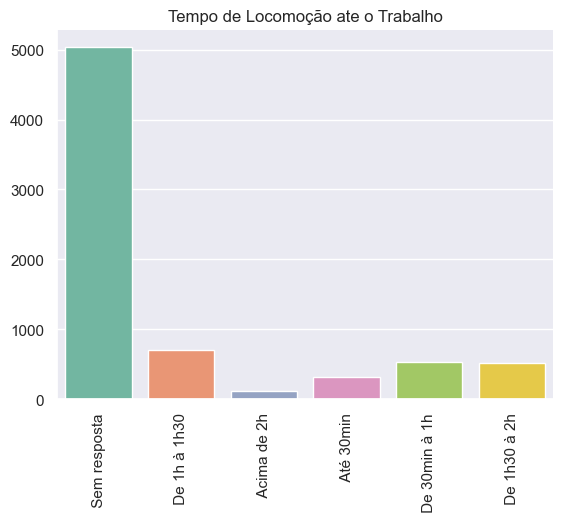

In [85]:
plt.title("Tempo de Locomoção ate o Trabalho")
sns.countplot(
    data=df, 
    x="P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?",
    hue="P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?",
    palette="Set2",
    legend=False
)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

Obtemos que:

          69% dos colaboradores não responderam ou não tiveram suas respostas computadas.
          

# 3.6 Você possui dependentes?

In [87]:
 # Total

df["P 06: Você possui dependentes?"].value_counts()


P 06: Você possui dependentes?
Não             4838
Sim             2269
Sem resposta     133
Name: count, dtype: int64

In [93]:
# Frequencia relativa 

df["P 06: Você possui dependentes?"].value_counts() / sum(df["P 06: Você possui dependentes?"].value_counts())

P 06: Você possui dependentes?
Não             0.668232
Sim             0.313398
Sem resposta    0.018370
Name: count, dtype: float64

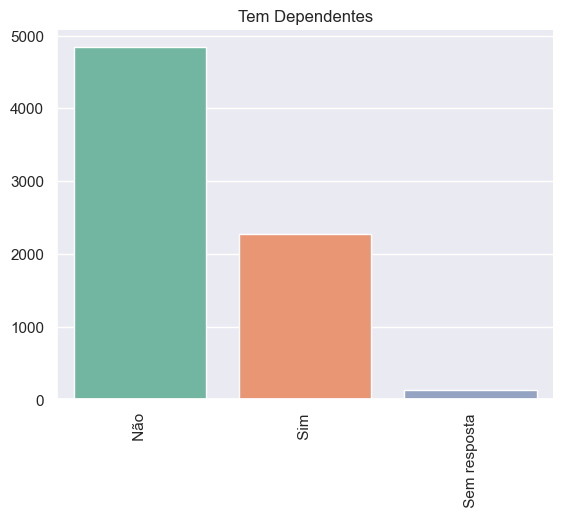

In [94]:
plt.title("Tem Dependentes")
sns.countplot(
    data=df, 
    x="P 06: Você possui dependentes?",
    hue="P 06: Você possui dependentes?",
    palette="Set2",
    legend=False
)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

Obtemos que:

          66% dos colaboradores não possuem dependentes.
          31% dos colaboradores possuem dependentes.
          

# 3.7 É bom trabalhar com meus colegas de trabalho?

In [95]:
 # Total

df["P 07: É bom trabalhar com meus colegas de trabalho."].value_counts()

P 07: É bom trabalhar com meus colegas de trabalho.
5 - Concordo totalmente    3296
4 - Concordo               2687
0 - Sem resposta            684
3 - Indiferente             514
2 - Discordo                 45
1 - Discordo totalmente      14
Name: count, dtype: int64

In [96]:
# Frequencia relativa 

df["P 07: É bom trabalhar com meus colegas de trabalho."].value_counts() / sum(df["P 07: É bom trabalhar com meus colegas de trabalho."].value_counts())

P 07: É bom trabalhar com meus colegas de trabalho.
5 - Concordo totalmente    0.455249
4 - Concordo               0.371133
0 - Sem resposta           0.094475
3 - Indiferente            0.070994
2 - Discordo               0.006215
1 - Discordo totalmente    0.001934
Name: count, dtype: float64

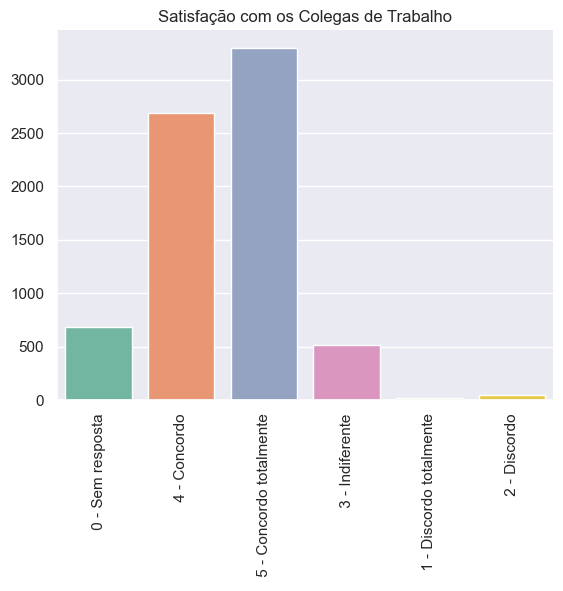

In [97]:
plt.title("Satisfação com os Colegas de Trabalho")
sns.countplot(
    data=df, 
    x="P 07: É bom trabalhar com meus colegas de trabalho.",
    hue="P 07: É bom trabalhar com meus colegas de trabalho.",
    palette="Set2",
    legend=False
)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

Obtemos que:

          82% dos colaboradores concordam ou concordam totalmente que estão satisfeitos com os seus colegas.
        

# 3.8 Não tenho medo de criticar pessoas em cargos de liderança

In [98]:
 # Total

df["P 08: Não tenho medo de criticar pessoas em cargos de liderança."].value_counts()


P 08: Não tenho medo de criticar pessoas em cargos de liderança.
3 - Indiferente            1853
2 - Discordo               1831
4 - Concordo               1744
0 - Sem resposta            684
1 - Discordo totalmente     668
5 - Concordo totalmente     460
Name: count, dtype: int64

In [99]:
# Frequencia relativa 

df["P 08: Não tenho medo de criticar pessoas em cargos de liderança."].value_counts() / sum(df["P 08: Não tenho medo de criticar pessoas em cargos de liderança."].value_counts())

P 08: Não tenho medo de criticar pessoas em cargos de liderança.
3 - Indiferente            0.255939
2 - Discordo               0.252901
4 - Concordo               0.240884
0 - Sem resposta           0.094475
1 - Discordo totalmente    0.092265
5 - Concordo totalmente    0.063536
Name: count, dtype: float64

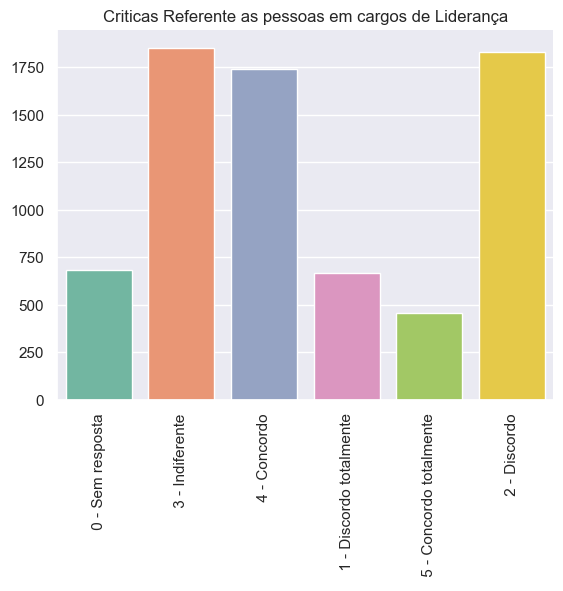

In [101]:
plt.title("Criticas Referente as pessoas em cargos de Liderança")
sns.countplot(
    data=df, 
    x="P 08: Não tenho medo de criticar pessoas em cargos de liderança.",
    hue="P 08: Não tenho medo de criticar pessoas em cargos de liderança.",
    palette="Set2",
    legend=False
)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

Obtemos que:

          25% dos colaboradores tem medo de criticar pessoas em cargos de Lidernaça.
          24% dos colaboradores não tem medo de criticar pessoas em cargos de Lidernaça.
          25% dos colaboradores são indiferentes em criticar pessoas em cargos de Lidernaça.

# 3.9 Fico tenso quando estou trabalhando

In [102]:
 # Total

df["P 09: Fico tenso quando estou trabalhando."].value_counts()


P 09: Fico tenso quando estou trabalhando.
2 - Discordo               2725
3 - Indiferente            1798
1 - Discordo totalmente    1066
4 - Concordo                780
0 - Sem resposta            684
5 - Concordo totalmente     187
Name: count, dtype: int64

In [103]:
# Frequencia relativa 

df["P 09: Fico tenso quando estou trabalhando."].value_counts() / sum(df["P 09: Fico tenso quando estou trabalhando."].value_counts())

P 09: Fico tenso quando estou trabalhando.
2 - Discordo               0.376381
3 - Indiferente            0.248343
1 - Discordo totalmente    0.147238
4 - Concordo               0.107735
0 - Sem resposta           0.094475
5 - Concordo totalmente    0.025829
Name: count, dtype: float64

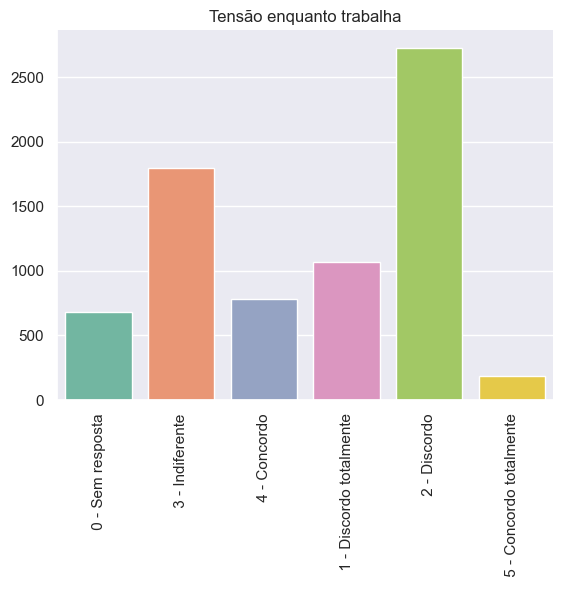

In [104]:
plt.title("Tensão enquanto trabalha")
sns.countplot(
    data=df, 
    x="P 09: Fico tenso quando estou trabalhando.",
    hue="P 09: Fico tenso quando estou trabalhando.",
    palette="Set2",
    legend=False
)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

Obtemos que:

      51% dos colaboradores discordam ou discordam totalmente que ficam tensos enquanto trabalham.
      24% dos colaboradores indiferem que ficam tensos enquanto trabalham.
  

# 3.10 Não gosto de situações que requerem que eu me comporte de forma controlada

In [105]:
 # Total

df["P 10: Não gosto de situações que requerem que eu me comporte de forma controlada."].value_counts()

P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.
3 - Indiferente            2282
2 - Discordo               2115
1 - Discordo totalmente    1037
4 - Concordo                887
0 - Sem resposta            684
5 - Concordo totalmente     235
Name: count, dtype: int64

In [106]:
# Frequencia relativa 

df["P 10: Não gosto de situações que requerem que eu me comporte de forma controlada."].value_counts() / sum(df["P 10: Não gosto de situações que requerem que eu me comporte de forma controlada."].value_counts())

P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.
3 - Indiferente            0.315193
2 - Discordo               0.292127
1 - Discordo totalmente    0.143232
4 - Concordo               0.122514
0 - Sem resposta           0.094475
5 - Concordo totalmente    0.032459
Name: count, dtype: float64

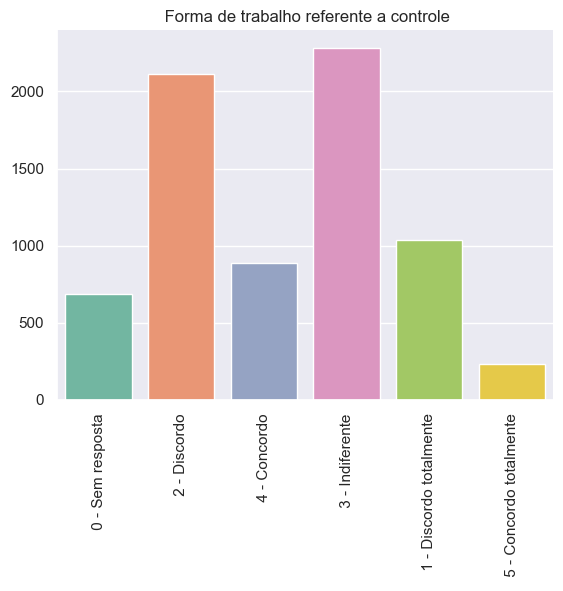

In [107]:
plt.title(" Forma de trabalho referente a controle")
sns.countplot(
    data=df, 
    x="P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.",
    hue="P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.",
    palette="Set2",
    legend=False
)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

Obtemos que:

  43% dos colaboradores discordam ou discordam totalmente que não gostam de situações que requerem que se comportem de forma controlada.
  31% dos colaboradores indiferem que não gostam de situações que requerem que se comportem de forma controlada.

# 3.11 Gosto de dizer o que penso.

In [109]:
 # Total

df["P 11: Gosto de dizer o que penso."].value_counts()

P 11: Gosto de dizer o que penso.
4 - Concordo               3482
3 - Indiferente            1417
5 - Concordo totalmente     957
0 - Sem resposta            684
2 - Discordo                641
1 - Discordo totalmente      59
Name: count, dtype: int64

In [110]:
# Frequencia relativa 

df["P 11: Gosto de dizer o que penso."].value_counts() / sum(df["P 11: Gosto de dizer o que penso."].value_counts())

P 11: Gosto de dizer o que penso.
4 - Concordo               0.480939
3 - Indiferente            0.195718
5 - Concordo totalmente    0.132182
0 - Sem resposta           0.094475
2 - Discordo               0.088536
1 - Discordo totalmente    0.008149
Name: count, dtype: float64

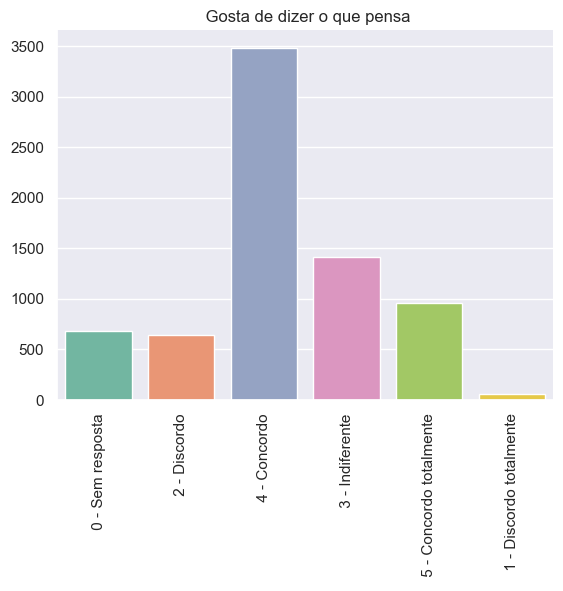

In [112]:
plt.title(" Gosta de dizer o que pensa")
sns.countplot(
    data=df, 
    x="P 11: Gosto de dizer o que penso.",
    hue="P 11: Gosto de dizer o que penso.",
    palette="Set2",
    legend=False
)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

Obtemos que:

  61% dos colaboradores concordam ou concordam totalmente que gostam de dizer o que pensam.
  19% dos colaboradores indiferem que gostam de dizer o que pensam.

# 3.12 Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.

In [113]:
# Total

df["P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar."].value_counts()

P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.
2 - Discordo               3335
1 - Discordo totalmente    1456
3 - Indiferente            1134
0 - Sem resposta            684
4 - Concordo                507
5 - Concordo totalmente     124
Name: count, dtype: int64

In [114]:
# Frequencia relativa 

df["P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar."].value_counts() / sum(df["P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar."].value_counts())

P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.
2 - Discordo               0.460635
1 - Discordo totalmente    0.201105
3 - Indiferente            0.156630
0 - Sem resposta           0.094475
4 - Concordo               0.070028
5 - Concordo totalmente    0.017127
Name: count, dtype: float64

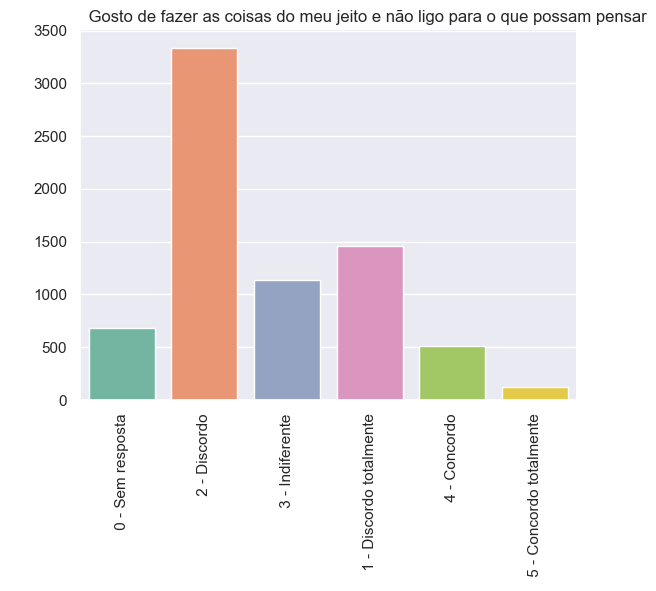

In [118]:
plt.title("                 Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar")
sns.countplot(
    data=df, 
    x="P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.",
    hue="P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.",
    palette="Set2",
    legend=False
)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
sns.despine()
plt.show()

Obtemos que:

  66% dos colaboradores discordam ou discordam totalmente que não gostam de fazer as coisas do seu jeito e não ligam para o que possam pensa.
  15% dos colaboradores indiferem que gostam de fazer as coisas do seu jeito e não ligam para o que possam pensa.

# 3.13 Boa_Performance .

In [120]:
# Total

df["Boa_Performance"].value_counts()

Boa_Performance
1    4089
0    3151
Name: count, dtype: int64

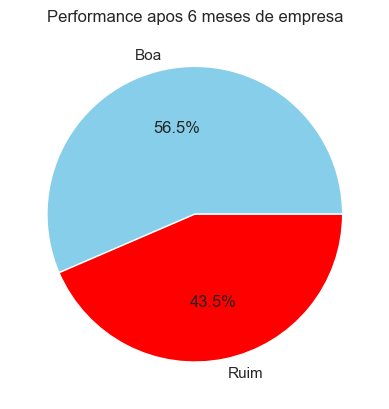

In [123]:
plt.title("Performance apos 6 meses de empresa")

valores = df["Boa_Performance"].value_counts()

plt.pie(valores, labels=["Boa", "Ruim"], colors=["skyblue", "red"], autopct='%1.1f%%')
plt.show()

No conjunto de dados,contém uma Performance ruim de 43.5%, na análise bivariada irei procurar entender o que está associado a esse grande número.

# 4 Análise Bivariada

# Cálculo do Information Value


O cálculo do Information Value (IV), uma técnica estatística utilizada para avaliar o poder preditivo de variáveis independentes em relação a uma variável de resultado.

Quanto maior o IV de uma variável, maior é a sua capacidade de discriminar entre as categorias da variável resultado.

Os valores de IV podem ser interpretados da seguinte forma:

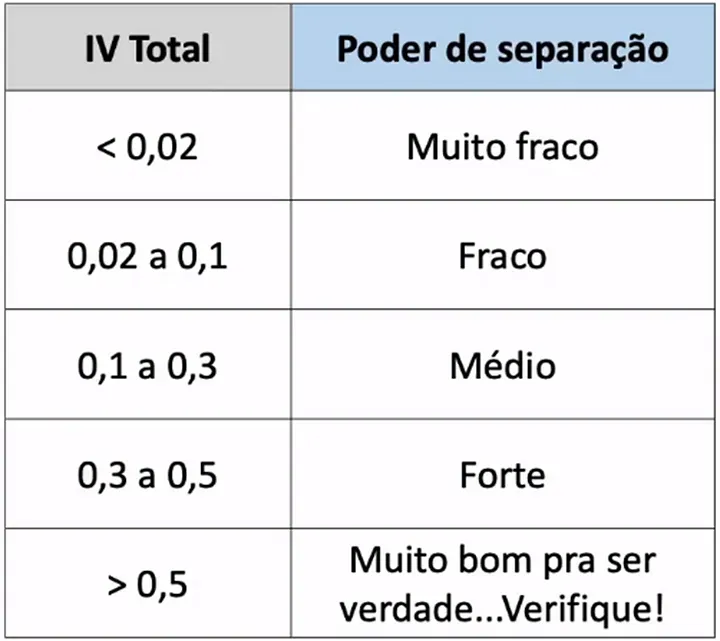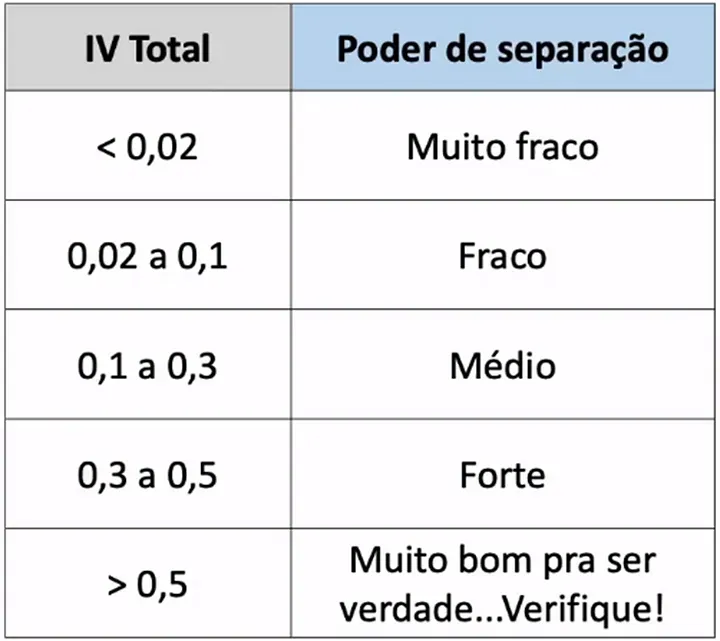






In [6]:
values_iv = sc.iv(df, "Boa_Performance")
values_iv

,variable,info_value
3,P 02: Qual área de atendimento você atua ou at...,0.033429
1,P 07: É bom trabalhar com meus colegas de trab...,0.026451
10,"P 01: Antes de trabalhar na empresa, você tinh...",0.025222
0,P 06: Você possui dependentes?,0.022636
9,P 03: Qual a sua escolaridade?,0.015219
2,P 05: Qual o tempo gasto no trajeto da sua res...,0.011531
11,Id_Agente,0.010905
8,P 11: Gosto de dizer o que penso.,0.008098
6,P 08: Não tenho medo de criticar pessoas em ca...,0.008058
12,P 04: Qual seu conhecimento em inglês?,0.005125


In [50]:
# Função para calcular WoE, IV e Probabilidade de Boa_Performance
def calculate_woe_iv_prob(df, feature, target):
    # Agrupa os dados por categoria da variável
    lst = []
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': df[df[feature] == val].count()[feature],
            'Good': df[(df[feature] == val) & (df[target] == 1)].count()[feature],
            'Bad': df[(df[feature] == val) & (df[target] == 0)].count()[feature]
        })
    dset = pd.DataFrame(lst)
    
    # Calcula as proporções e o WoE
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    
    # Calcula a probabilidade de Boa_Performance = 1 (em porcentagem)
    dset['Prob_Boa_Performance'] = (dset['Good'] / (dset['Good'] + dset['Bad']) * 100).round(2).astype(str) + '%'
    
    # Formata as colunas Distr_Good e Distr_Bad como porcentagens
    dset['Distr_Good'] = (dset['Distr_Good'] * 100).round(2).astype(str) + '%'
    dset['Distr_Bad'] = (dset['Distr_Bad'] * 100).round(2).astype(str) + '%'
    
    # Calcula o IV
    dset['IV'] = (dset['Good'] / dset['Good'].sum() - dset['Bad'] / dset['Bad'].sum()) * dset['WoE']
    iv = dset['IV'].sum()
    
    return dset, iv

# Carregar o arquivo
df = pd.read_excel('base_atendimento.xlsx', sheet_name='Base')

# Lista de variáveis categóricas (excluindo a variável alvo e variáveis numéricas)
categorical_vars = [
    'P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?',
    'P 02: Qual área de atendimento você atua ou atuou por mais tempo?',
    'P 03: Qual a sua escolaridade?',
    'P 04: Qual seu conhecimento em inglês?',
    'P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?',
    'P 06: Você possui dependentes?',
    'P 07: É bom trabalhar com meus colegas de trabalho.',
    'P 08: Não tenho medo de criticar pessoas em cargos de liderança.',
    'P 09: Fico tenso quando estou trabalhando.',
    'P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.',
    'P 11: Gosto de dizer o que penso.',
    'P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.'
]

# Dicionário para armazenar os resultados
results = {}

# Calcular WoE, IV e Probabilidade de Boa_Performance para cada variável categórica
for var in categorical_vars:
    woe_iv_prob_df, iv = calculate_woe_iv_prob(df, var, 'Boa_Performance')
    results[var] = {
        'WoE_Table': woe_iv_prob_df,
        'IV': iv
    }

# Exibir os resultados
for var, result in results.items():
    print(f"Variável: {var}")
    print(result['WoE_Table'])
    print(f"Information Value (IV): {result['IV']}")
    print("\n" + "="*50 + "\n")

Variável: P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?
                                 Value   All  Good   Bad Distr_Good Distr_Bad  \
0                                  Não  2380  1389   991     33.97%    31.45%   
1                                  Sim  3651  1938  1713      47.4%    54.36%   
2   A empresa é o meu primeiro emprego  1038   664   374     16.24%    11.87%   
3                         Sem resposta   171    98    73       2.4%     2.32%   

        WoE Prob_Boa_Performance        IV  
0  0.077044               58.36%  0.001941  
1 -0.137170               53.08%  0.009558  
2  0.313446               63.97%  0.013696  
3  0.033927               57.31%  0.000027  
Information Value (IV): 0.02522194279387866


Variável: P 02: Qual área de atendimento você atua ou atuou por mais tempo?
                          Value   All  Good   Bad Distr_Good Distr_Bad  \
0                  Sem resposta  3613  2161  1452     52.85%    46.08%   
1         

## Conclusão

Os Maiores IV foram da seguintes Categorias:P 02: Qual área de atendimento você atua ou atuou por mais tempo?;P 07: É bom trabalhar com meus colegas de trabalho.;P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center? e P 06: Você possui dependentes? e com isso foram retirados os seguintes Insights:


Entre os colaboradores com experiência, destaquei as experiências em setores que tiveram a maior taxa de boa performance: Backoffice, Ativo de Vendas, Chat ou email, Multiskill e Suporte Técnico c/ Vendas. Observei ainda os setores com a menor taxa de boa performance como Suporte Técnico e Retenção.

Focar em colaboradores que gostam de trabalho em equipe, visto que a Taxa de Boa Performance nesse grupo, foi de 55% (concordo) e 59,5% (concordo plenamente). O IV da variável “Gosta de trabalhar em equipe”, em relação a boa performance foi de 0,029.

Na variável “Possui Dependentes”, como já foi mostrado anteriormente, os colaboradores que não possuem dependentes, representam 66,8% dos colaboradores e nessa análise podemos ver que ela apresenta ainda uma melhor taxa de boa performance (59%), em relação a quem possui dependentes (51%). O IV dessa variável em relação a boa performance é de 0,023.


# Respondendo as Perguntas do Négocio

## Quais fatores o time de Atração de Talentos deve olhar para selecionar candidatos com maior chance de ter boa performance após 6 meses à data da contratação?


1. Experiência em Setores com Alta Taxa de Boa Performance
Setores com maior taxa de boa performance:

Backoffice

Ativo de Vendas

Chat ou email

Multiskill

Suporte Técnico com Vendas

Ação sugerida:

Priorizar candidatos com experiência nesses setores, pois eles apresentam maior probabilidade de sucesso.

Durante o processo de recrutamento, avaliar a experiência prévia do candidato e dar preferência àqueles que já atuaram em áreas com alta taxa de boa performance.

2. Evitar Setores com Baixa Taxa de Boa Performance
Setores com menor taxa de boa performance:

Suporte Técnico (sem vendas)

Retenção

Ação sugerida:

Reduzir o foco em candidatos com experiência predominante nesses setores, a menos que haja outros fatores compensatórios (como habilidades comportamentais ou técnicas relevantes).

3. Preferência por Colaboradores que Gostam de Trabalho em Equipe
Dados:

Colaboradores que concordam ou concordam plenamente que gostam de trabalhar em equipe têm taxas de boa performance de 55% e 59,5%, respectivamente.

O IV da variável "Gosta de trabalhar em equipe" é 0,029, indicando uma influência positiva, embora moderada.

Ação sugerida:

Incluir perguntas ou dinâmicas no processo seletivo para avaliar a afinidade do candidato com trabalho em equipe.

Priorizar candidatos que demonstram habilidades de colaboração e preferência por ambientes colaborativos.

4. Colaboradores sem Dependentes
Dados:

Colaboradores sem dependentes representam 66,8% do total e têm uma taxa de boa performance de 59%, comparado a 51% para aqueles com dependentes.

O IV da variável "Possui Dependentes" é 0,023, indicando uma influência positiva, mas menor.

Ação sugerida:

Dar preferência a candidatos sem dependentes, pois eles apresentam uma taxa de boa performance ligeiramente maior.

No entanto, esse fator deve ser considerado com cautela, pois pode envolver questões éticas e de diversidade.

5. Avaliação de Habilidades Comportamentais
Dados:

Colaboradores que gostam de trabalhar em equipe e não possuem dependentes têm maior probabilidade de boa performance.

Ação sugerida:

Incluir avaliações comportamentais no processo seletivo, como testes de perfil comportamental ou dinâmicas de grupo, para identificar candidatos com essas características.

Focar em competências como colaboração, resiliência e adaptabilidade.

## Com base nisso, qual política de contratação deve passar a valer de forma que a empresa aumente as boas contratações?

Estruturando a política de contratação utilizando o método 5W2H, que é uma ferramenta eficaz para planejamento e execução de ações. O método consiste em responder às seguintes perguntas:

What (O que será feito?)

Why (Por que será feito?)

Where (Onde será feito?)

When (Quando será feito?)

Who (Quem fará?)

How (Como será feito?)

How much (Quanto custará?)

Aqui está a política de contratação estruturada com o método 5W2H:

Política de Contratação para Aumentar as Boas Contratações
1. What (O que será feito?)
Implementar uma política de contratação focada em selecionar candidatos com maior probabilidade de boa performance após 6 meses, com base em dados e análises de desempenho.

2. Why (Por que será feito?)
Objetivo: Aumentar a taxa de boas contratações, reduzir o turnover e melhorar a produtividade da equipe.

Justificativa: A análise dos dados mostrou que colaboradores com experiência em setores específicos (Backoffice, Ativo de Vendas, Chat ou email, Multiskill e Suporte Técnico com Vendas), que gostam de trabalhar em equipe e não possuem dependentes, têm maior probabilidade de boa performance.

3. Where (Onde será feito?)
Local: Em todos os processos de recrutamento e seleção da empresa, tanto para vagas presenciais quanto remotas.

Setores prioritários: Backoffice, Ativo de Vendas, Chat ou email, Multiskill e Suporte Técnico com Vendas.

4. When (Quando será feito?)
Início: Imediato, a partir da próxima rodada de contratações.

Frequência: Contínuo, com revisões trimestrais para ajustar os critérios com base em novos dados de performance.

5. Who (Quem fará?)
Responsáveis:

Equipe de Recrutamento e Seleção: Aplicar os novos critérios de seleção.

Gestores de Área: Avaliar a adequação dos candidatos às necessidades específicas dos setores.

Analistas de Dados: Monitorar e atualizar os indicadores de performance e IV das variáveis.

Envolvidos:

Candidatos: Serão avaliados com base nos novos critérios.

Líderes de equipe: Darão feedback sobre o desempenho dos novos contratados.

6. How (Como será feito?)
Passo a Passo:

Definir critérios de seleção:

Priorizar candidatos com experiência em setores de alta performance (Backoffice, Ativo de Vendas, Chat ou email, Multiskill e Suporte Técnico com Vendas).

Avaliar a afinidade com trabalho em equipe por meio de perguntas comportamentais e dinâmicas de grupo.

Considerar a ausência de dependentes como um fator adicional, mas não exclusivo.

Incluir avaliações comportamentais:

Utilizar testes de perfil comportamental para identificar colaboradores com habilidades como colaboração, resiliência e adaptabilidade.

Avaliar conhecimentos técnicos:

Realizar testes práticos ou entrevistas técnicas para verificar o domínio de ferramentas e processos relevantes.

Monitorar o desempenho:

Acompanhar a performance dos novos contratados após 6 meses para validar os critérios de seleção.

Ajustar os critérios:

Revisar trimestralmente os dados de performance e atualizar os critérios de seleção com base nos novos insights.

7. How much (Quanto custará?)
Investimentos necessários:

Ferramentas de avaliação comportamental: R
5.000
a
R
5.000aR 10.000 por ano (dependendo do fornecedor).

Treinamento da equipe de recrutamento: R
2.000
a
R
2.000aR 5.000 (para capacitação em técnicas de seleção baseadas em dados).

Tempo da equipe: Aproximadamente 20 horas por semana dedicadas à implementação e monitoramento da nova política.

Retorno esperado:

Aumento da taxa de boas contratações em 10% a 20%.

Redução do turnover em 15% a 25%.

Melhoria na produtividade geral da equipe.

Resumo da Política de Contratação
A política de contratação proposta visa selecionar candidatos com maior probabilidade de boa performance após 6 meses, com base em dados e análises. Para isso, serão priorizados candidatos com experiência em setores de alta performance, habilidades comportamentais alinhadas (como trabalho em equipe) e características demográficas relevantes (como ausência de dependentes). A implementação será feita pela equipe de recrutamento, com monitoramento contínuo e ajustes trimestrais.

Benefícios Esperados:
Aumento da taxa de boas contratações.

Redução do turnover.

Melhoria na produtividade e engajamento da equipe.

Tomada de decisão mais assertiva no recrutamento.
